In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Normalize(array: pd.DataFrame, Q: int, size: int):
    p = array['lng(E)'][0]
    normalized = array['lng(E)'] - p + np.log(Q)
    return ( array['E'], normalized)


def MLOThermo(T, energies, lnge, N, k: float=1):
    
    # Find the maximum exponent lambda (10.1119/1.1707017)

    energies = np.array(energies) * N**2

    exponents = []
    for L, E in zip(lnge, energies):
        exponents.append(L - E/(k*T))
    exponents = np.array(exponents)
    maxval = np.max(exponents)

    #Calculate F(T), U(T), C(T), and S(T)
    sigma = 0
    mu = 0
    kappa = 0
    for L, E in zip(lnge, energies):
        exponent = np.exp(L - E/(k*T) - maxval)
        sigma += exponent
        mu += exponent * E
        kappa += exponent * E * E

    lnZ = maxval + np.log(sigma)
    F = (-k*T*lnZ) / N

    U = mu / (sigma * N) 

    C = ((kappa / sigma)  - (mu / sigma)**2) / (k*T*N)

    S = (U-F) / T

    return (F, U, C, S)

/tmp/ipykernel_428800/487220734.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x*N, y,  'bo-', label=f'{g}x{g}, Flatness: 0.8', alpha=0.6, color=color, markersize=4)


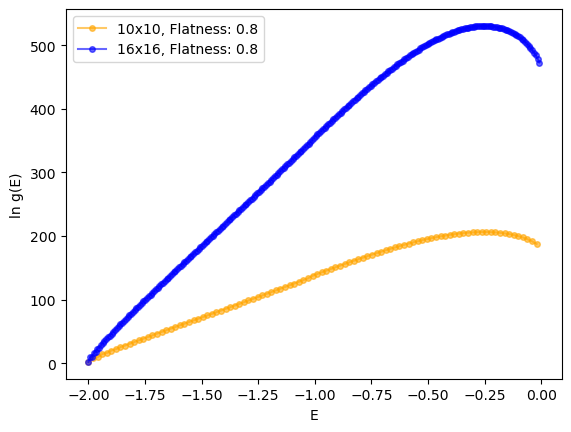

/tmp/ipykernel_428800/487220734.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(temps, plots[:, 2], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)


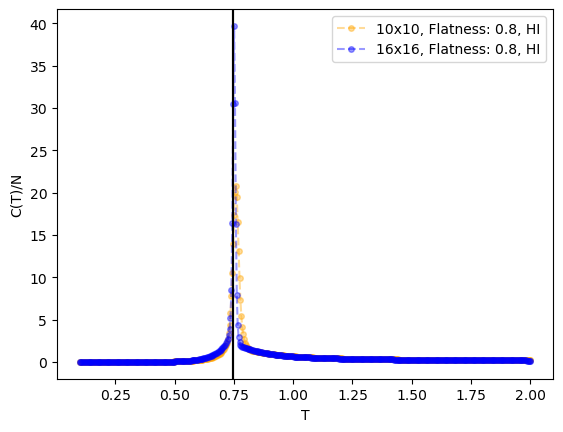

/tmp/ipykernel_428800/487220734.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(temps, plots[:, 0], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)


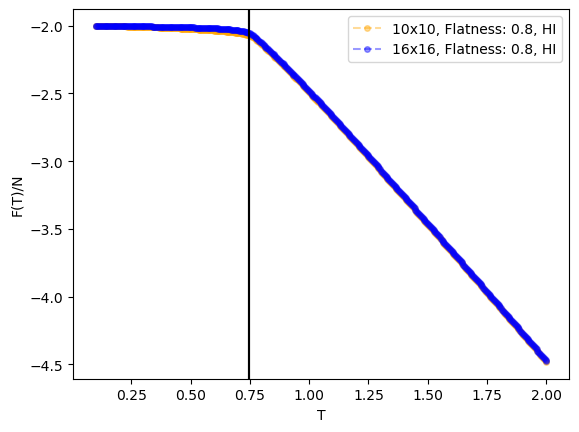

/tmp/ipykernel_428800/487220734.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(temps, plots[:, 1], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)


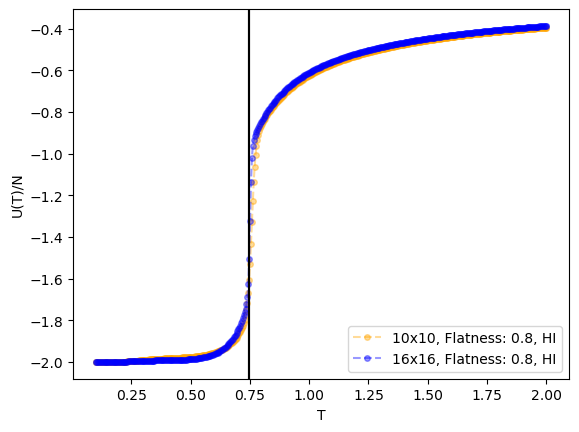

/tmp/ipykernel_428800/487220734.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(temps, plots[:, 3], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)


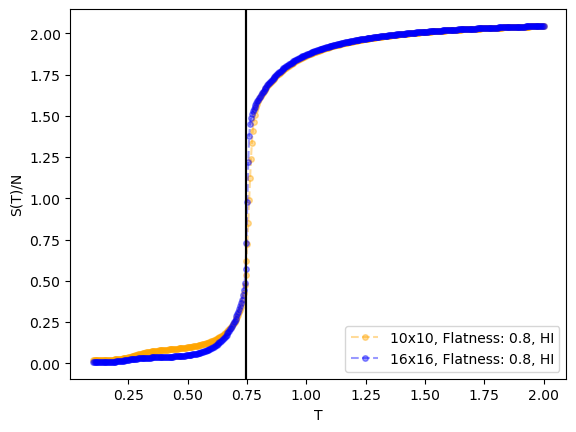

In [4]:
data10 = pd.read_csv('WLA-RUN-10x10/out_final.txt')
data16 = pd.read_csv('16x16/out_final.txt')


data = [data10, data16]
colors=['orange', 'blue']
gridsizes=[10,16]
latticesize = [x**2 for x in gridsizes]

tc = 1./(np.log(1+np.sqrt(8)))


for color, N, g, d in zip(colors, latticesize, gridsizes, data):
    x,y = Normalize(d,8,N)
    plt.plot(x*N, y,  'bo-', label=f'{g}x{g}, Flatness: 0.8', alpha=0.6, color=color, markersize=4)

plt.ylabel('ln g(E)')
plt.xlabel('E')
plt.legend(loc='best')
plt.show()

temps = np.linspace(0.1, 2., 500)  # T varies from 0.4 to 8

for color, N, g, d in zip(colors, latticesize, gridsizes, data):
    x,y = Normalize(d, 8, N)
    plots = []
    for T in temps:
        plots.append(MLOThermo(T,x,y,N))
    plots = np.array(plots)
    fig = plt.figure(1)
    plt.plot(temps, plots[:, 2], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)
    plt.axvline(tc, color='k')
    plt.xlabel('T')
    plt.ylabel('C(T)/N')
    plt.legend(loc='best')
plt.show()

for color, N, g, d in zip(colors, latticesize, gridsizes, data):
    x,y = Normalize(d, 8, N)
    plots = []
    for T in temps:
        plots.append(MLOThermo(T,x,y,N))
    plots = np.array(plots)
    fig = plt.figure(1)
    plt.plot(temps, plots[:, 0], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)
    plt.axvline(tc, color='k')
    plt.xlabel('T')
    plt.ylabel('F(T)/N')
    plt.legend(loc='best')
plt.show()

for color, N, g, d in zip(colors, latticesize, gridsizes, data):
    x,y = Normalize(d, 8, N)
    plots = []
    for T in temps:
        plots.append(MLOThermo(T,x,y,N))
    plots = np.array(plots)
    fig = plt.figure(1)
    plt.plot(temps, plots[:, 1], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)
    plt.axvline(tc, color='k')
    plt.xlabel('T')
    plt.ylabel('U(T)/N')
    plt.legend(loc='best')
plt.show()

for color, N, g, d in zip(colors, latticesize, gridsizes, data):
    x,y = Normalize(d, 8, N)
    plots = []
    for T in temps:
        plots.append(MLOThermo(T,x,y,N))
    plots = np.array(plots)
    fig = plt.figure(1)
    plt.plot(temps, plots[:, 3], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)
    plt.axvline(tc, color='k')
    plt.xlabel('T')
    plt.ylabel('S(T)/N')
    plt.legend(loc='best')
plt.show()


/tmp/ipykernel_428800/1947191703.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(energies / N,dist, 'ko-', color=color, label=label, alpha=0.6)


Text(0.5, 0, 'E')

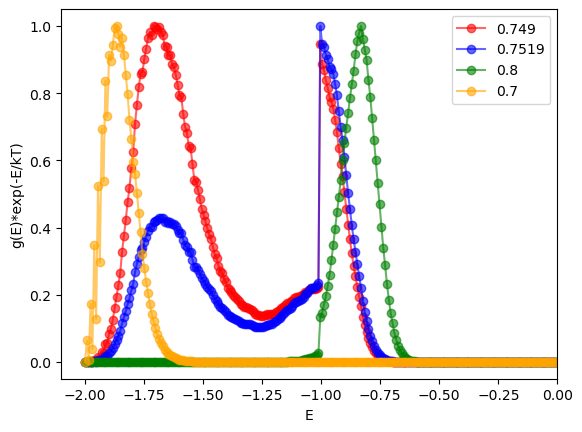

In [18]:
def BoltzmannDist(energies, lnge, N, T, color, label):
    k = 1
    energies = np.array(energies) * N*N
    exponents = []
    for L, E in zip(lnge, energies):
        exponents.append(L - E/(k*T))
    exponents = np.array(exponents)
    maxval = np.max(exponents)

    #Calculate g(e)*exp(-E/T)
    dist = []
    for L, E in zip(lnge, energies):
        dist.append(np.exp(L - E/(k*T) - maxval))
    plt.plot(energies / N,dist, 'ko-', color=color, label=label, alpha=0.6)
    plt.xlim(-2.1,0)


tc = 1./(np.log(1+np.sqrt(8)))


data16 = pd.read_csv('16x16/out_final.txt')
x,y = Normalize(data16, 8, 256)
BoltzmannDist(x,y,256,0.749,'red', '0.749')
BoltzmannDist(x,y,256,0.7519,'blue', '0.7519')
BoltzmannDist(x,y,256,0.8,'green', '0.8')
BoltzmannDist(x,y,256,0.7,'orange', '0.7')
plt.legend()
plt.ylabel('g(E)*exp(-E/kT)')
plt.xlabel('E')


/tmp/ipykernel_428800/2224991490.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(energies / N,dist, 'ko-', color=color, label=label, alpha=0.6)


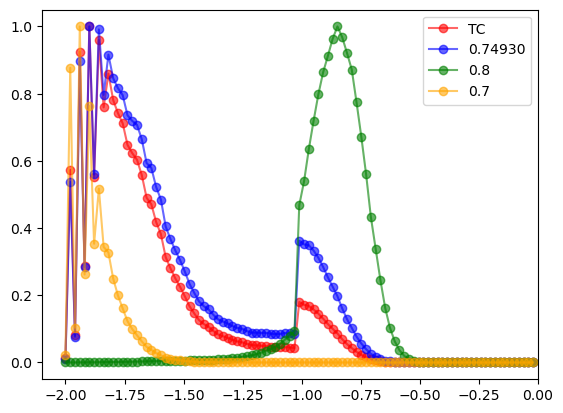

In [6]:
tc = 1./(np.log(1+np.sqrt(8)))


data10 = pd.read_csv('WLA-RUN-10x10/out_final.txt')
x,y = Normalize(data10, 8, 100)
BoltzmannDist(x,y,100,tc,'red', 'TC')
BoltzmannDist(x,y,100,0.74930,'blue', '0.74930')
BoltzmannDist(x,y,100,0.8,'green', '0.8')
BoltzmannDist(x,y,100,0.7,'orange', '0.7')
plt.legend()

/tmp/ipykernel_428800/4017781402.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x*N, y,  'bo-', label=f'{g}x{g}, Flatness: 0.8', alpha=0.6, color=color, markersize=4)


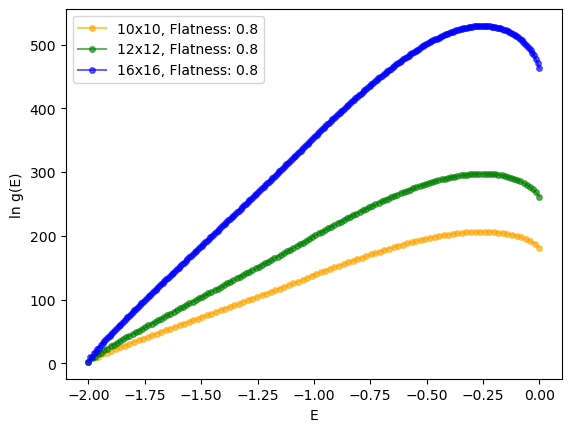

/tmp/ipykernel_428800/4017781402.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(temps, plots[:, 2], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)


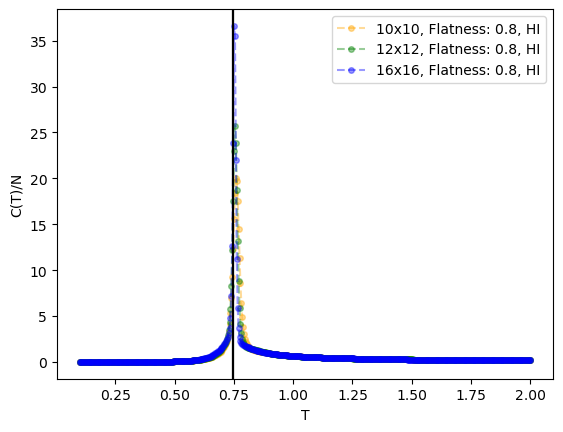

/tmp/ipykernel_428800/4017781402.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(temps, plots[:, 0], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)


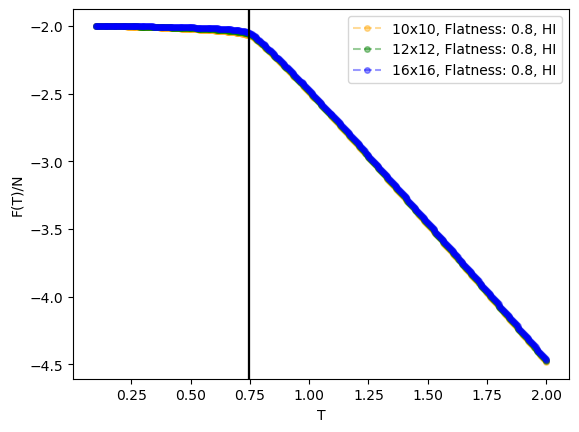

/tmp/ipykernel_428800/4017781402.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(temps, plots[:, 1], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)


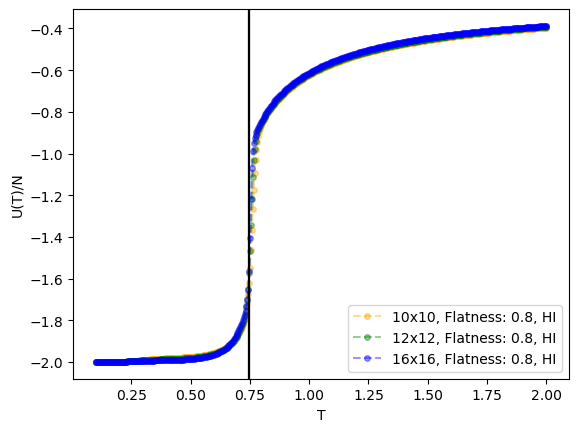

/tmp/ipykernel_428800/4017781402.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(temps, plots[:, 3], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)


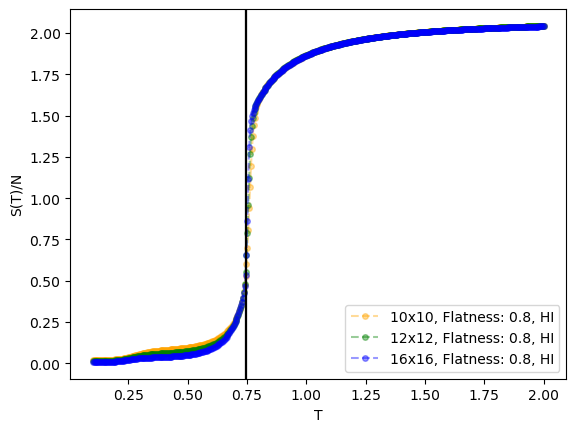

In [7]:
data10 = pd.read_csv('10x10_Q8_NEWSAMPLER/out_final.txt')
data12 = pd.read_csv('12x12_Q8_NEWSAMPLER/out_final.txt')
data16 = pd.read_csv('16x16_Q8_NEWSAMPLER/out_final.txt')

data = [data10, data12, data16]
colors=['orange', 'green', 'blue']
gridsizes=[10,12,16]
latticesize = [x**2 for x in gridsizes]

tc = 1./(np.log(1+np.sqrt(8)))


for color, N, g, d in zip(colors, latticesize, gridsizes, data):
    x,y = Normalize(d,8,N)
    plt.plot(x*N, y,  'bo-', label=f'{g}x{g}, Flatness: 0.8', alpha=0.6, color=color, markersize=4)

plt.ylabel('ln g(E)')
plt.xlabel('E')
plt.legend(loc='best')
plt.show()

temps = np.linspace(0.1, 2., 500)  # T varies from 0.4 to 8

for color, N, g, d in zip(colors, latticesize, gridsizes, data):
    x,y = Normalize(d, 8, N)
    plots = []
    for T in temps:
        plots.append(MLOThermo(T,x,y,N))
    plots = np.array(plots)
    fig = plt.figure(1)
    plt.plot(temps, plots[:, 2], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)
    plt.axvline(tc, color='k')
    plt.xlabel('T')
    plt.ylabel('C(T)/N')
    plt.legend(loc='best')
plt.show()

for color, N, g, d in zip(colors, latticesize, gridsizes, data):
    x,y = Normalize(d, 8, N)
    plots = []
    for T in temps:
        plots.append(MLOThermo(T,x,y,N))
    plots = np.array(plots)
    fig = plt.figure(1)
    plt.plot(temps, plots[:, 0], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)
    plt.axvline(tc, color='k')
    plt.xlabel('T')
    plt.ylabel('F(T)/N')
    plt.legend(loc='best')
plt.show()

for color, N, g, d in zip(colors, latticesize, gridsizes, data):
    x,y = Normalize(d, 8, N)
    plots = []
    for T in temps:
        plots.append(MLOThermo(T,x,y,N))
    plots = np.array(plots)
    fig = plt.figure(1)
    plt.plot(temps, plots[:, 1], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)
    plt.axvline(tc, color='k')
    plt.xlabel('T')
    plt.ylabel('U(T)/N')
    plt.legend(loc='best')
plt.show()

for color, N, g, d in zip(colors, latticesize, gridsizes, data):
    x,y = Normalize(d, 8, N)
    plots = []
    for T in temps:
        plots.append(MLOThermo(T,x,y,N))
    plots = np.array(plots)
    fig = plt.figure(1)
    plt.plot(temps, plots[:, 3], 'ko--', label=f'{g}x{g}, Flatness: 0.8, HI', alpha=0.4, color=color, markersize=4)
    plt.axvline(tc, color='k')
    plt.xlabel('T')
    plt.ylabel('S(T)/N')
    plt.legend(loc='best')
plt.show()
plt.savefig('lnge-versus-e.png')


/tmp/ipykernel_428800/1947191703.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(energies / N,dist, 'ko-', color=color, label=label, alpha=0.6)


Text(0.5, 0, 'E')

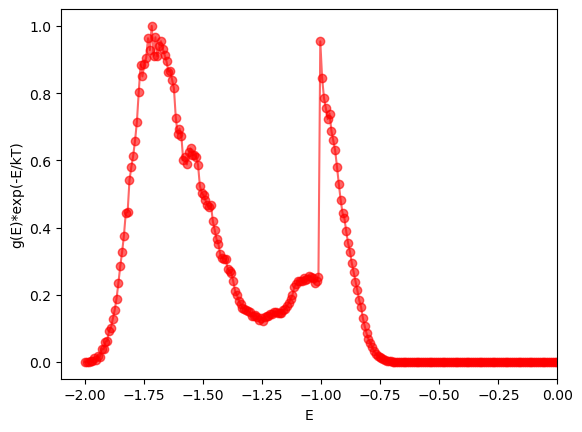

In [19]:
data16 = pd.read_csv('16x16_Q8_NEWSAMPLER/out_final.txt')
x,y = Normalize(data16, 8, 256)
BoltzmannDist(x,y,256,0.7505,'red', 'T=0.7505')
plt.ylabel('g(E)*exp(-E/kT)')
plt.xlabel('E')

(275.0, 400.0)

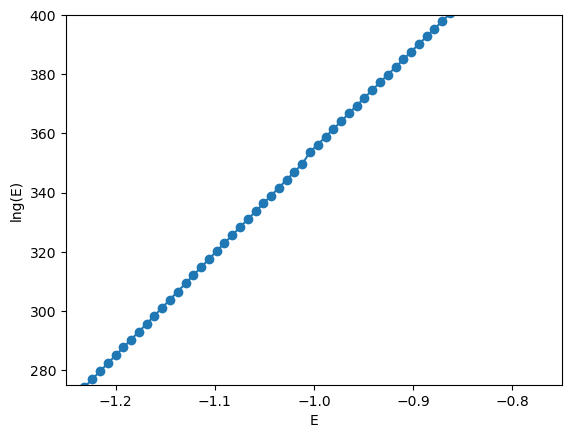

In [28]:
data16 = pd.read_csv('16x16_Q8_NEWSAMPLER/out_final.txt')
x,y = Normalize(data16, 8, 256)
plt.plot(x*256,y, '-o')
plt.ylabel('lng(E)')
plt.xlabel('E')
plt.xlim(-1.25,-0.75)
plt.ylim(275,400)